### temporary setup after `make ssh`, `cdata`, and `make syncup`

```python
conda activate fastai2
mamba install cython dask scikit-image -y
pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"
pip install git+git://github.com/waspinator/pycococreator.git@0.2.0
pip -q install icedata
cd work
pip install -e . # install local ceruleanml package after deps installed with conda
conda deactivate
```

In [1]:
import ceruleanml.data as data
from pathlib import Path
import skimage.io as skio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from icevision.all import *
import icedata

ml_data_path = os.path.join(os.path.abspath(os.getcwd()),"../../data/cv2_transfer/outputs/skytruth_annotation/first_phase/")
path = Path(ml_data_path)
class_folders = list(path.glob("*/"))

In [ ]:
%matplotlib inline

In [2]:
info = {
    "description": "Cerulean Dataset V2",
    "url": "none",
    "version": "1.0",
    "year": 2021,
    "contributor": "Skytruth",
    "date_created": "2022/2/23"
}

licenses = [
    {
        "url": "none",
        "id": 1,
        "name": "CeruleanDataset V2"
    }
]
categories = [{"supercategory":"slick", "id":1,"name":"infra_slick"},
              {"supercategory":"slick", "id":2,"name":"natural_seep"},
              {"supercategory":"slick", "id":3,"name":"coincident_vessel"},
              {"supercategory":"slick", "id":4,"name":"recent_vessel"},
              {"supercategory":"slick", "id":5,"name":"old_vessel"},
              {"supercategory":"slick", "id":6,"name":"ambiguous"}]

coco_output = {
    "info": info,
    "licenses": licenses,
    "images": [],
    "annotations": [],
    "categories": categories
}

In [28]:
#path = icedata.coco.load_data()
icedata.coco

<module 'icedata.datasets.coco' from '/root/miniconda3/envs/fastai2/lib/python3.9/site-packages/icedata/datasets/coco/__init__.py'>

In [31]:
class_map = {
    "Infrastructure": 1,
    "Natural Seep": 2,
    "Coincident Vessel": 3,
    "Recent Vessel": 4,
    "Old Vessel": 5,
    "Ambiguous": 6,
    "Hard Negatives": 0,
}

class_map

{'Infrastructure': 1,
 'Natural Seep': 2,
 'Coincident Vessel': 3,
 'Recent Vessel': 4,
 'Old Vessel': 5,
 'Ambiguous': 6,
 'Hard Negatives': 0}

In [35]:
path

Path('/root/work/gcpvm/../../data/cv2_transfer/outputs/skytruth_annotation/first_phase')

In [36]:
parser = icedata.coco.parser(data_dir=path, class_map=class_map)

TypeError: 'module' object is not callable

In [ ]:
# https://github.com/airctic/icedata/blob/master/icedata/datasets/coco/parser.py
# > https://github.com/airctic/icevision/blob/master/icevision/parsers/coco_parser.py

In [8]:
ls {ml_data_path}

canonical_vessel/   instances_slick_train_v2.json  recent_vessel/
coincident_vessel/  natural_seep/
infrastructure/     old_vessel/


In [10]:
ls {ml_data_path}/canonical_vessel/S1A_IW_GRDH_1SDV_20200729T034859_20200729T034924_033664_03E6D3_93EF

Background.png  ambiguous_1.png  vessel_coincident_1.png  vessel_old_1.png


In [ ]:
#cat {ml_data_path}/instances_slick_train_v2.json

In [40]:
img = mpimg.imread(f'{ml_data_path}/canonical_vessel/S1A_IW_GRDH_1SDV_20200729T034859_20200729T034924_033664_03E6D3_93EF/ambiguous_1.png')

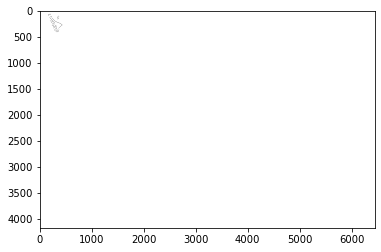

In [41]:
plt.imshow(img)